In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("height&weight.csv")

In [10]:
df.head()

,Height (cm),Weight (kg)
0,160,55
1,165,60
2,170,65
3,175,70
4,180,75


In [11]:
df.tail()

,Height (cm),Weight (kg)
15,163,58
16,169,64
17,176,71
18,181,77
19,164,59


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Height (cm)  20 non-null     int64
 1   Weight (kg)  20 non-null     int64
dtypes: int64(2)
memory usage: 452.0 bytes


In [13]:
df.describe()

,Height (cm),Weight (kg)
count,20.000000,20.000000
mean,169.650000,64.950000
std,8.086864,8.281082
min,155.000000,50.000000
25%,163.750000,58.750000
50%,169.500000,64.500000
75%,176.250000,71.250000
max,182.000000,78.000000


In [15]:
df.isnull().sum()

Height (cm)    0
Weight (kg)    0
dtype: int64

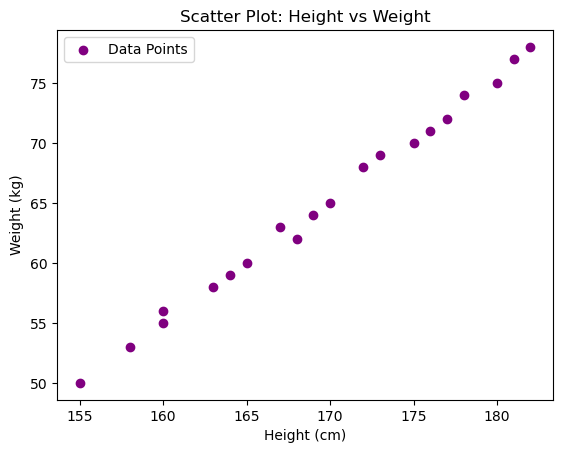

In [17]:
X = data['Height (cm)'].values
y = data['Weight (kg)'].values

plt.scatter(X, y, color='purple', label='Data Points')
plt.title('Scatter Plot: Height vs Weight')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.legend()
plt.show() 

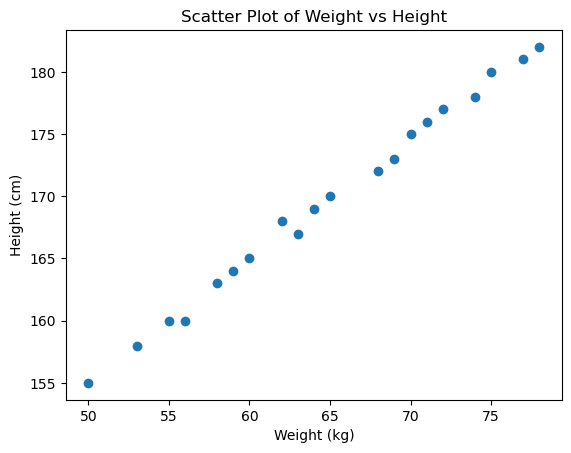

In [22]:
plt.scatter(df['Weight (kg)'], df['Height (cm)'])
plt.xlabel("Weight (kg)")
plt.ylabel("Height (cm)")
plt.title("Scatter Plot of Weight vs Height")
plt.show()

In [26]:
df.corr()

,Height (cm),Weight (kg)
Height (cm),1.000000,0.997845
Weight (kg),0.997845,1.000000


In [25]:
correlation = data[['Height (cm)', 'Weight (kg)']].corr().iloc[0, 1]
print(f"Correlation between Height and Weight: {correlation:.2f}")


Correlation between Height and Weight: 1.00


C:\Users\CVR\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


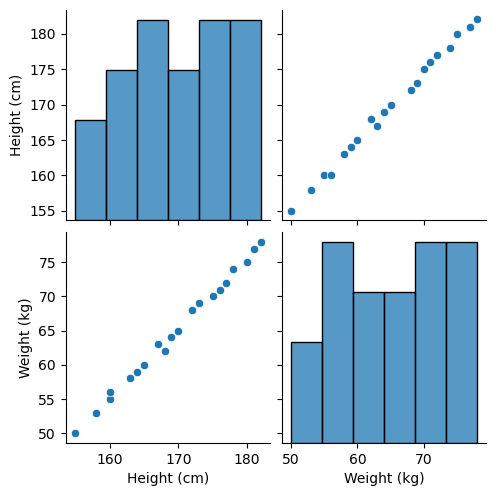

In [28]:
import seaborn as sns
sns.pairplot(df)
plt.show()

In [31]:
## Independent features
x= df[['Height (cm)']]
type(x)
 

pandas.core.frame.DataFrame

In [33]:
df.shape

(20, 2)

In [34]:
np.array(x.shape)

array([20,  1])

# Train test split

In [35]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=42)
x_train.shape

(15, 1)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(x_train)
 

array([[-2.16389724],
       [-1.50417247],
       [ 0.47500183],
       [ 1.26667155],
       [-0.31666789],
       [ 0.21111193],
       [-0.18472293],
       [ 0.73889174],
       [-0.97639266],
       [ 1.1347266 ],
       [-0.44861284],
       [ 0.07916697],
       [ 1.39861651],
       [ 0.87083669],
       [-0.5805578 ]])

In [40]:
x_test=scaler.transform(x_test)
x_test

C:\Users\CVR\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-22.813833  ],
       [-22.53528146],
       [-22.76160458],
       [-22.72678564],
       [-22.84865194]])

**Simple linear Regression**

In [41]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression(n_jobs=-1)
regression.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

**Slope and intercept**

In [42]:
print("slope",regression.coef_)
print("intercept",regression.intercept_)

slope [1.01926648]
intercept -107.90227483751163


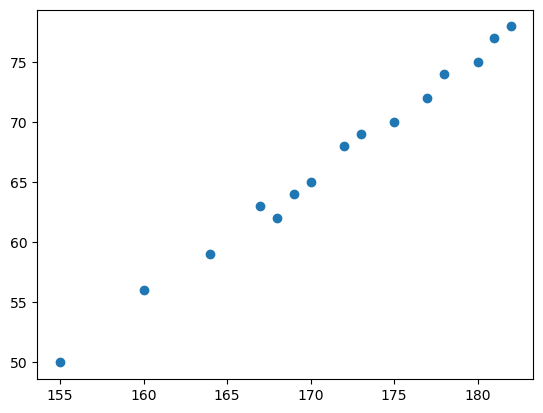

In [43]:
## plot Training data plot best fit line
scatter = plt.scatter(x_train,y_train)
plt.show(scatter)

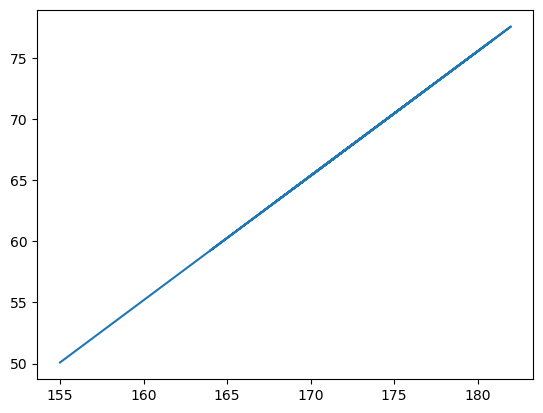

In [46]:
slope_of_best_fit = plt.plot(x_train,regression.predict(x_train))
plt.show(slope_of_best_fit)

# Linear Regression on (Heights & Weights)

Linear Regression Equation: Weight = 1.02 * Height + -108.40


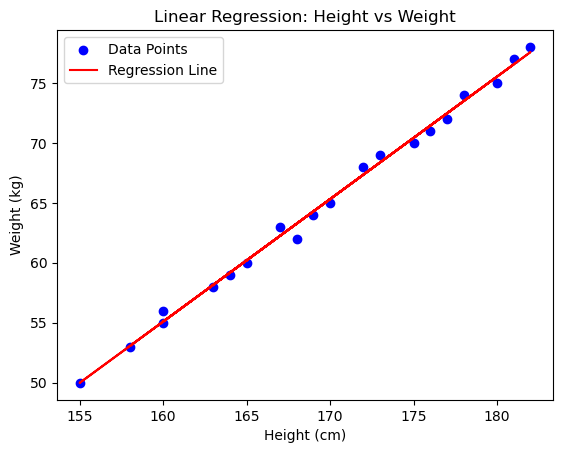

In [20]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

data = pd.read_csv('height&weight.csv')

X = data['Height (cm)'].values.reshape(-1, 1)
y = data['Weight (kg)'].values

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_

print(f"Linear Regression Equation: Weight = {slope:.2f} * Height + {intercept:.2f}")

predicted_weight = model.predict(X)

plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, predicted_weight, color='red', label='Regression Line')
plt.title('Linear Regression: Height vs Weight')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.legend()
plt.show()
